### REGRESSÃO

**GRUPO D:** 
- ESTHER DAGIR
- FELIPE LEMOS
- JV PAZOTTI

**DESCRIÇÃO DATASET CORD19**

Artigos acadêmicos relacionados ao COVID-19 e suas variantes que integram o dataset CORD-19. Coleção mais extensa (+134.000 artigos) de pesquisa sobre coronavírus legível por máquina disponível para mineração de dados até o momento, solicitada pelo governo americano em conjunto com entidades de pesquisa sobre o vírus e suas variantes. 

### Importando as Bibliotecas


In [106]:
import pandas as pd
import seaborn as sns
import netpixi
from netpixi.integration.gt import *
from regression.integration.gt import *
import regression as reg
import numpy as np
from graph_tool import centrality

In [107]:
cord19 = pd.read_csv('data/cord19.csv')

In [108]:
g=gt_load('data/cord19_graph.net.gz')
g = gt_clean(g)

In [109]:
bc, _ = centrality.betweenness(g)
g.add_vp('betweenness', bc)

In [110]:
bt_data=gt_data(g)
vertex_data=pd.merge(bt_data,cord19,on='id')
vertex_data

,id,coreness_x,betweenness,coreness_y,degree
0,0,0.162791,0.0,0.162791,10
1,1,0.078095,0.0,0.078095,8
2,2,0.176607,0.0,0.176607,12
3,3,0.046953,0.0,0.046953,7
4,4,0.189650,0.0,0.189650,14
...,...,...,...,...,...
9699,9699,0.221435,0.0,0.221435,18
9700,9700,0.079222,0.0,0.079222,8
9701,9701,0.949768,0.0,0.949768,34
9702,9702,0.178282,0.0,0.178282,13


### Dataset Final

In [111]:
journal_data=pd.read_csv('data/df_final.csv')
journal_data

,doi,title,authors,journal,Rank,SJR,h_index,total_docs,total_refs,total_cits,avg_cit_per_doc,avg_ref_per_doc,Country,Region,Publisher,Coverage,Categories,Areas
0,10.1186/1471-2458-4-34,Logistics of community smallpox control throug...,"Porco, Travis C; Holbrook, Karen A; Fernyak, S...",bmc public health,2695,"1,307",178,8305,115725,28137,"4,49","48,24",United Kingdom,Western Europe,BioMed Central Ltd.,2001-2022,"Public Health, Environmental and Occupational ...",Medicine
1,NaN,Reduced level of physical activity during COVI...,"Puccinelli, P. J.; da Costa, T. S.; Seffrin, A...",bmc public health,2695,"1,307",178,8305,115725,28137,"4,49","48,24",United Kingdom,Western Europe,BioMed Central Ltd.,2001-2022,"Public Health, Environmental and Occupational ...",Medicine
2,10.1186/1475-2859-4-2,Protein secretion in Lactococcus lactis : an e...,"Le Loir, Yves; Azevedo, Vasco; Oliveira, Sergi...",microbial cell factories,3647,"1,091",116,937,15174,4401,"6,45","54,98",United Kingdom,Western Europe,BioMed Central Ltd.,2002-2022,Applied Microbiology and Biotechnology (Q1); B...,"Biochemistry, Genetics and Molecular Biology; ..."
3,10.1186/s12934-020-01429-7,Correction to: Activation and enhancement of c...,"Xie, Yunchang; Chen, Jiawen; Wang, Bo; Chen, T...",microbial cell factories,3647,"1,091",116,937,15174,4401,"6,45","54,98",United Kingdom,Western Europe,BioMed Central Ltd.,2002-2022,Applied Microbiology and Biotechnology (Q1); B...,"Biochemistry, Genetics and Molecular Biology; ..."
4,10.15698/mic2022.01.767,Detection of severe acute respiratory syndrome...,"Durand, Mathieu; Thibault, Philippe; Lévesque,...",microbial cell factories,3647,"1,091",116,937,15174,4401,"6,45","54,98",United Kingdom,Western Europe,BioMed Central Ltd.,2002-2022,Applied Microbiology and Biotechnology (Q1); B...,"Biochemistry, Genetics and Molecular Biology; ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5090,10.1109/jsac.2021.3088663,5G-Enabled UAV-to-Community Offloading: Joint ...,"Ning, Z. L.; Dong, P. R.; Wen, M. W.; Wang, X....",ieee journal on selected areas in communications,122,"7,656",251,927,11676,11104,"16,98","48,25",United States,Northern America,Institute of Electrical and Electronics Engine...,1983-2022,Computer Networks and Communications (Q1); Ele...,Computer Science; Engineering
5091,10.3233/cbm-203103,YTHDF1 amplification is correlated with worse ...,"Li, Cheukfai; Zhang, Chuanzhao; Zhang, Guochun...",cancer biomarkers,8223,"0,622",50,562,5612,1297,"2,86","40,96",Netherlands,Western Europe,IOS Press BV,2005-2022,Medicine (miscellaneous) (Q2); Cancer Research...,"Biochemistry, Genetics and Molecular Biology; ..."
5092,10.1097/mou.0000000000000973,Implications and effects of COVID-19 on diagno...,"Chan, V. W.; Asif, A.; Koe, J. S.; Ng, A.; Ng,...",current opinion in neurology,1722,"1,701",130,455,6759,1859,"4,54","60,35",United States,Northern America,Lippincott Williams and Wilkins Ltd.,1993-2022,Neurology (Q1); Neurology (clinical) (Q1),Medicine; Neuroscience
5093,10.1016/j.camwa.2022.01.013,Numerical simulation of pulmonary airway reope...,"He, B.; Qin, C.; Chen, W.; Wen, B.",computers and mathematics with applications,5382,"0,857",143,1590,15796,3779,"2,99","42,81",United Kingdom,Western Europe,Elsevier Ltd.,1975-2022,Computational Theory and Mathematics (Q1); Mod...,Computer Science; Mathematics


In [112]:
journal_data['SJR'] = journal_data['SJR'].str.replace(',', '.').astype(float)

In [113]:
journal_copy = journal_data.copy()


journal_copy['authors'] = journal_copy['authors'].apply(lambda x: x.split('; '))

journal_copy = journal_copy.explode('authors')

journal_copy = journal_copy.drop_duplicates(subset='authors', keep='first')


In [114]:
journal_copy = journal_copy.sort_values('Rank').reset_index(drop=True)


journal_copy = journal_copy.iloc[:len(vertex_data)]


In [115]:
journal_copy.reset_index(inplace=True)

journal_copy.rename(columns={'index': 'id'}, inplace=True)

journal_copy




,id,doi,title,authors,journal,Rank,SJR,h_index,total_docs,total_refs,total_cits,avg_cit_per_doc,avg_ref_per_doc,Country,Region,Publisher,Coverage,Categories,Areas
0,0,10.1038/ncb3580,Local lung hypoxia determines epithelial fate ...,"Shannon, John M.",nature reviews molecular cell biology,3,34.201,485,449,10804,13331,"35,47","89,29",United Kingdom,Western Europe,Nature Publishing Group,2000-2022,Cell Biology (Q1); Molecular Biology (Q1),"Biochemistry, Genetics and Molecular Biology"
1,1,10.1016/j.molcel.2020.09.008,Structures of B. subtilis Maturation RNases Ca...,"Tisné, Carine",nature reviews molecular cell biology,3,34.201,485,449,10804,13331,"35,47","89,29",United Kingdom,Western Europe,Nature Publishing Group,2000-2022,Cell Biology (Q1); Molecular Biology (Q1),"Biochemistry, Genetics and Molecular Biology"
2,2,10.1016/j.molcel.2020.09.008,Structures of B. subtilis Maturation RNases Ca...,"Luisi, Ben F",nature reviews molecular cell biology,3,34.201,485,449,10804,13331,"35,47","89,29",United Kingdom,Western Europe,Nature Publishing Group,2000-2022,Cell Biology (Q1); Molecular Biology (Q1),"Biochemistry, Genetics and Molecular Biology"
3,3,10.1016/j.molcel.2020.09.008,Structures of B. subtilis Maturation RNases Ca...,"Cianferani, Sarah",nature reviews molecular cell biology,3,34.201,485,449,10804,13331,"35,47","89,29",United Kingdom,Western Europe,Nature Publishing Group,2000-2022,Cell Biology (Q1); Molecular Biology (Q1),"Biochemistry, Genetics and Molecular Biology"
4,4,10.1016/j.molcel.2020.09.008,Structures of B. subtilis Maturation RNases Ca...,"Barraud, Pierre",nature reviews molecular cell biology,3,34.201,485,449,10804,13331,"35,47","89,29",United Kingdom,Western Europe,Nature Publishing Group,2000-2022,Cell Biology (Q1); Molecular Biology (Q1),"Biochemistry, Genetics and Molecular Biology"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9699,9699,10.14336/ad.2021.1102,Rapidly Progressive Dementia with Asymmetric R...,"Jaiswal, S.",aging and disease,1751,1.682,72,517,13927,2973,"7,25","107,96",United States,Northern America,International Society on Aging and Disease,2010-2022,Cell Biology (Q1); Geriatrics and Gerontology ...,"Biochemistry, Genetics and Molecular Biology; ..."
9700,9700,10.14336/ad.2021.1102,Rapidly Progressive Dementia with Asymmetric R...,"Chakrabarti, S. S.",aging and disease,1751,1.682,72,517,13927,2973,"7,25","107,96",United States,Northern America,International Society on Aging and Disease,2010-2022,Cell Biology (Q1); Geriatrics and Gerontology ...,"Biochemistry, Genetics and Molecular Biology; ..."
9701,9701,10.14336/ad.2021.1102,Rapidly Progressive Dementia with Asymmetric R...,"Kumar, I.",aging and disease,1751,1.682,72,517,13927,2973,"7,25","107,96",United States,Northern America,International Society on Aging and Disease,2010-2022,Cell Biology (Q1); Geriatrics and Gerontology ...,"Biochemistry, Genetics and Molecular Biology; ..."
9702,9702,10.1111/cpr.13042,Maternal sevoflurane exposure induces temporar...,"Tang, Tianxiang",cell proliferation,1752,1.681,85,709,10090,4441,"8,24","59,01",United Kingdom,Western Europe,Wiley-Blackwell Publishing Ltd,"1968-1982, 1984-2022",Cell Biology (Q1); Medicine (miscellaneous) (Q1),"Biochemistry, Genetics and Molecular Biology; ..."


In [116]:
vertex_copy=vertex_data.copy()
reg_data=pd.merge(journal_copy,vertex_copy,on='id')
reg_data['avg_cit_per_doc'] = reg_data['avg_cit_per_doc'].str.replace(',', '.').astype(float)

reg_data

,id,doi,title,authors,journal,Rank,SJR,h_index,total_docs,total_refs,...,Country,Region,Publisher,Coverage,Categories,Areas,coreness_x,betweenness,coreness_y,degree
0,0,10.1038/ncb3580,Local lung hypoxia determines epithelial fate ...,"Shannon, John M.",nature reviews molecular cell biology,3,34.201,485,449,10804,...,United Kingdom,Western Europe,Nature Publishing Group,2000-2022,Cell Biology (Q1); Molecular Biology (Q1),"Biochemistry, Genetics and Molecular Biology",0.162791,0.0,0.162791,10
1,1,10.1016/j.molcel.2020.09.008,Structures of B. subtilis Maturation RNases Ca...,"Tisné, Carine",nature reviews molecular cell biology,3,34.201,485,449,10804,...,United Kingdom,Western Europe,Nature Publishing Group,2000-2022,Cell Biology (Q1); Molecular Biology (Q1),"Biochemistry, Genetics and Molecular Biology",0.078095,0.0,0.078095,8
2,2,10.1016/j.molcel.2020.09.008,Structures of B. subtilis Maturation RNases Ca...,"Luisi, Ben F",nature reviews molecular cell biology,3,34.201,485,449,10804,...,United Kingdom,Western Europe,Nature Publishing Group,2000-2022,Cell Biology (Q1); Molecular Biology (Q1),"Biochemistry, Genetics and Molecular Biology",0.176607,0.0,0.176607,12
3,3,10.1016/j.molcel.2020.09.008,Structures of B. subtilis Maturation RNases Ca...,"Cianferani, Sarah",nature reviews molecular cell biology,3,34.201,485,449,10804,...,United Kingdom,Western Europe,Nature Publishing Group,2000-2022,Cell Biology (Q1); Molecular Biology (Q1),"Biochemistry, Genetics and Molecular Biology",0.046953,0.0,0.046953,7
4,4,10.1016/j.molcel.2020.09.008,Structures of B. subtilis Maturation RNases Ca...,"Barraud, Pierre",nature reviews molecular cell biology,3,34.201,485,449,10804,...,United Kingdom,Western Europe,Nature Publishing Group,2000-2022,Cell Biology (Q1); Molecular Biology (Q1),"Biochemistry, Genetics and Molecular Biology",0.189650,0.0,0.189650,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9699,9699,10.14336/ad.2021.1102,Rapidly Progressive Dementia with Asymmetric R...,"Jaiswal, S.",aging and disease,1751,1.682,72,517,13927,...,United States,Northern America,International Society on Aging and Disease,2010-2022,Cell Biology (Q1); Geriatrics and Gerontology ...,"Biochemistry, Genetics and Molecular Biology; ...",0.221435,0.0,0.221435,18
9700,9700,10.14336/ad.2021.1102,Rapidly Progressive Dementia with Asymmetric R...,"Chakrabarti, S. S.",aging and disease,1751,1.682,72,517,13927,...,United States,Northern America,International Society on Aging and Disease,2010-2022,Cell Biology (Q1); Geriatrics and Gerontology ...,"Biochemistry, Genetics and Molecular Biology; ...",0.079222,0.0,0.079222,8
9701,9701,10.14336/ad.2021.1102,Rapidly Progressive Dementia with Asymmetric R...,"Kumar, I.",aging and disease,1751,1.682,72,517,13927,...,United States,Northern America,International Society on Aging and Disease,2010-2022,Cell Biology (Q1); Geriatrics and Gerontology ...,"Biochemistry, Genetics and Molecular Biology; ...",0.949768,0.0,0.949768,34
9702,9702,10.1111/cpr.13042,Maternal sevoflurane exposure induces temporar...,"Tang, Tianxiang",cell proliferation,1752,1.681,85,709,10090,...,United Kingdom,Western Europe,Wiley-Blackwell Publishing Ltd,"1968-1982, 1984-2022",Cell Biology (Q1); Medicine (miscellaneous) (Q1),"Biochemistry, Genetics and Molecular Biology; ...",0.178282,0.0,0.178282,13


### Recortes 

- 1 : Region 
- 2: Coverage 
    
    

In [117]:
recortes = reg_data.copy()

In [118]:
recortes = recortes[reg_data['Region'] == 'Western Europe']

In [119]:
def extract_years(year_range):
    split_years = [item.split('-') for item in year_range.split(',')]
    start_years = [int(year[0]) for year in split_years if len(year) >= 2]
    end_years = [int(year[1]) for year in split_years if len(year) >= 2]
    if start_years and end_years:
        return max(end_years) - min(start_years)
    else:
        return None

recortes['Age'] = recortes['Coverage'].map(extract_years)
recortes = recortes[recortes['Age'] > 30]

In [125]:
import regression as reg
result = reg.linear(data=recortes, formula='SJR ~  betweenness + total_docs + total_refs+ total_cits + h_index ')
result.nano_summary()

-4.624 (5.632)
-0.001 (0.000) ***
+0.000 (0.000) ***
+0.000 (0.000) ***
+0.028 (0.001) ***


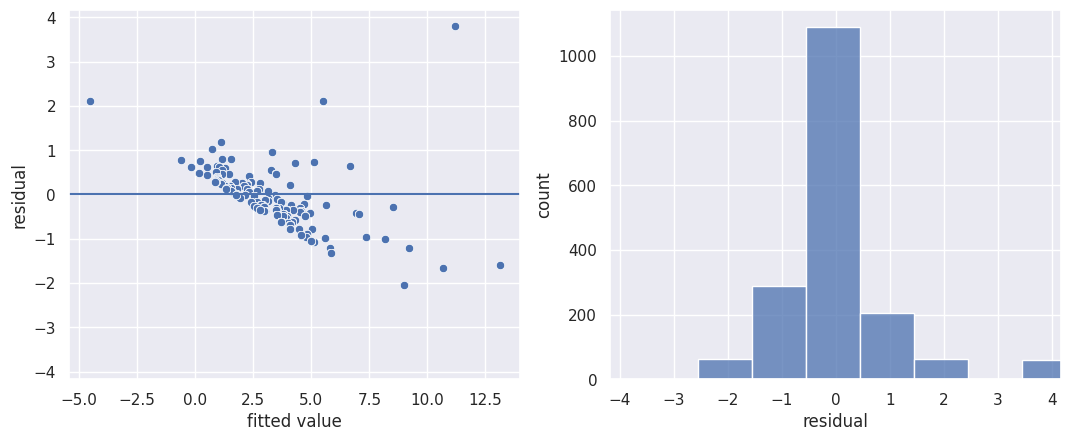

In [123]:
result.plot_residuals()